# Example 2

## 3D case

**Content**

This notebook reproduces the first example of the paper. It consists of four main subheadings;

- Importing the *hcpinnseikonal* package functions
- Define the arguments for the input parameters
- Setup the medium and compute the data
- Training and inference

**Saving directory**

The notebook utilized [*wandb*](https://wandb.ai) for keeping track of the parameters and experiments. You can uncomment the *wandb* call to turn this feature off. Accordingly you need to specify the folder to save your experiment by changing the related *wandb* line inside the main function below.

## 3D Plotting

In [ ]:
import pyvista as pv
import matplotlib.pyplot as plt

from pyvista import examples

mesh = examples.download_bunny()
mesh.flip_normals()

pl = pv.Plotter()
pl.add_mesh(mesh, color='lightgrey')
pl.background_color = 'white'
pl.camera_position = 'xy'

pl.show(jupyter_backend='pythreejs')

# widget = pl.show(jupyter_backend='pythreejs', return_viewer=True)

In [ ]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

from pyvista import examples

values = np.linspace(0, 10, 1000).reshape((20, 5, 10))

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array(values.shape) + 1

# Edit the spatial reference
grid.origin = (100, 33, 55.6)  # The bottom left corner of the data set
grid.spacing = (1, 5, 2)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_data["values"] = values.flatten(order="F")  # Flatten the array!

cmap = plt.cm.get_cmap("viridis", 4)

# Now plot the grid!
grid.plot(show_edges=True, cmap=cmap, jupyter_backend='pythreejs', background='white', show_axes=True)

In [ ]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

from pyvista import examples

mesh = examples.load_channels()
cmap = plt.cm.get_cmap("viridis", 4)

mesh.plot(cmap=cmap, jupyter_backend='pythreejs', background='white', show_axes=True)

In [ ]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

from pyvista import examples

mesh = examples.load_channels()
cmap = plt.cm.get_cmap("viridis", 4)

slices = mesh.slice_orthogonal(x=20, y=20, z=30)
slices.plot(cmap=cmap, jupyter_backend='pythreejs', background='white', show_axes=True)

## Import *hcpinnseikonal* package functions

In [1]:
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from argparse import ArgumentParser   
from scipy import interpolate
from scipy.ndimage import gaussian_filter

from hcpinnseikonal.utils import *
from hcpinnseikonal.model import *
from hcpinnseikonal.train3dwell import *
from hcpinnseikonal.plot import *
from hcpinnseikonal.arguments import *

args = parser.parse_args([])

args.use_wandb='n'
args.project_name='GFATT_PINNs-21-3d-field'

dict_args = vars(args)
print(dict_args)

# Change these lines for the wandb setup
if args.use_wandb=='y':
    wandb.init(project=args.project_name)
    wandb.run.log_code(".")
    wandb_dir = wandb.run.dir
else:
    args.save_folder='/home/taufikmh/KAUST/fall_2022/external_repos/copy-HCPINNsEikonal-dev/notebooks/wandb/run-20230213_151031-5p05onbq'
    from pathlib import Path
    Path(args.save_folder).mkdir(parents=True, exist_ok=True)
    wandb_dir = args.save_folder

{'lateral_spacing': 0.01, 'vertical_spacing': 0.01, 'max_offset': 5.0, 'max_depth': 1.0, 'rec_spacing': 10, 'sou_spacing': 10, 'num_epochs': 250, 'num_neurons': 20, 'num_layers': 10, 'learning_rate': 0.001, 'model_type': 'seam', 'data_type': 'full', 'middle_shot': 'n', 'until_cmb': 'n', 'earth_scale': 'n', 'scale_factor': 10, 'reduce_after': 15, 'seed': 123, 'initialization': 'varianceScaling', 'plotting_factor': 1, 'rescale_plot': 'n', 'depth_shift': 'n', 'tau_multiplier': 3.0, 'initial_velocity': 4, 'zid_source': 5, 'zid_receiver': 0, 'explode_reflector': 'n', 'field_synthetic': 'n', 'v_multiplier': 3, 'activation': 'elu', 'num_points': 1.0, 'irregular_grid': 'n', 'xid_well': 5, 'last_vmultiplier': 5, 'v_units': 'unitless', 'well_depth': None, 'exp_function': 'n', 'exp_factor': 1.0, 'exclude_topo': 'n', 'exclude_well': 'n', 'exclude_source': 'n', 'loss_function': 'mse', 'station_factor': 1.0, 'event_factor': 1.0, 'checker_size': 5.0, 'tau_act': 'None', 'empty_middle': 'n', 'factoriza

## Define arguments

In [2]:
args.scale_factor=2 
args.until_cmb='y' 
args.num_epochs=1000
args.seed=123 
args.learning_rate=1e-4
args.rescale_plot='n' 
args.initial_velocity=6 
args.zid_source=5 
args.zid_receiver=0 
args.data_type='full' 
args.irregular_grid='y' 
args.num_layers=15 
args.model_type='arid' 
args.v_multiplier=3. 
args.factorization_type='additive' 
args.tau_act=None 
args.tau_multiplier=3 
args.max_offset=5
args.max_depth=1 
args.vertical_spacing=0.01 
args.lateral_spacing=0.01 
args.num_neurons=20 
args.causality_factor=.5 

args.causality_weight='type_0' 
args.reduce_after=20 
args.field_synthetic='n' 
args.event_factor=0.9 
args.station_factor=0.2 
args.residual_network='y' 
args.empty_middle='n' 
args.regular_station='y' 
args.rec_spacing=10 
args.sou_spacing=10

args.sampling_rate=6

args.well_depth=101
args.initial_bias = 0.05
args.initial_mean = 1e-3
args.initial_deviation = 1e-4
args.dual_optimizer='y'
args.with_well='y'
args.v_function='l1'
args.xid_well=250
args.exclude_well='y'
args.initialization='varianceScaling'

dict_args=vars(args)
print(dict_args)

{'lateral_spacing': 0.01, 'vertical_spacing': 0.01, 'max_offset': 5, 'max_depth': 1, 'rec_spacing': 10, 'sou_spacing': 10, 'num_epochs': 1000, 'num_neurons': 20, 'num_layers': 15, 'learning_rate': 0.0001, 'model_type': 'arid', 'data_type': 'full', 'middle_shot': 'n', 'until_cmb': 'y', 'earth_scale': 'n', 'scale_factor': 2, 'reduce_after': 20, 'seed': 123, 'initialization': 'varianceScaling', 'plotting_factor': 1, 'rescale_plot': 'n', 'depth_shift': 'n', 'tau_multiplier': 3, 'initial_velocity': 6, 'zid_source': 5, 'zid_receiver': 0, 'explode_reflector': 'n', 'field_synthetic': 'n', 'v_multiplier': 3.0, 'activation': 'elu', 'num_points': 1.0, 'irregular_grid': 'y', 'xid_well': 250, 'last_vmultiplier': 5, 'v_units': 'unitless', 'well_depth': 101, 'exp_function': 'n', 'exp_factor': 1.0, 'exclude_topo': 'n', 'exclude_well': 'y', 'exclude_source': 'n', 'loss_function': 'mse', 'station_factor': 0.2, 'event_factor': 0.9, 'checker_size': 5.0, 'tau_act': None, 'empty_middle': 'n', 'factorization

## Interpolation with wells

### 2-D

The isotropic eikonal in 2-D (x-z medium) is given as,

$$|\nabla T(x, z)|^2 = \frac{1}{v^2(x, z)}.$$

What we aim for is a hard-constrained velocity prior version. In 2-D medium with $i$ denotes the index for the well, we have $x_{wi}, v(x=x_{wi},z)=v_{wi}(z)$ to denote the well location and velocity values, respectively. Therefore, for three wells, we have the following form of the right hand side of the eikonal

$$v(x,z) = \left(\prod_{i=1}^3 {\left(x - \mathit{x_{wi}}\right)} \right)v_{\theta}\left(x, z\right) + \sum_{i=1}^3\left(\prod_{j\neq i}^3\frac{x-x_{wj}}{x_{wi}-x_{wj}}\right){v_{wi}(z)}.$$

The first part is parameterized by the neural network $v_{\theta}\left(x, z\right)$ while the second part contains the well information.

### 3-D

Therefore, for 3-D, with $N$ number of wells, we can expand the above formulation into

$$|\nabla T(x, y, z)|^2 = \frac{1}{v^2(x, y, z)},$$

and

$$v(x,y,z) = \left(\prod_{i=1}^N {\left(x - \mathit{x_{wi}}\right)} + \prod_{j=1}^N {\left(y - \mathit{y_{wi}}\right)} \right)v_{\theta}\left(x, y, z\right) + \sum_{k=1}^N\left(\prod_{k\neq i}^N\frac{x-x_{wj}}{x_{wi}-x_{wj}}\cdot\prod_{k\neq j}^N\frac{y-y_{wj}}{y_{wi}-y_{wj}}\right){v_{wi}(z)}.$$

### Functions

In [ ]:
def velocity_well_3d(v_well, v_nn, x_well, x, y_well, y):
    
    first_x, first_y, second_term = 1, 1, 0
    
    for i in range(x_well.shape[-1]):
        first_x *= (x-x_well[0,i])
        first_y *= (y-y_well[0,i])
        second_x, second_y = 1, 1
        
        for j in range(x_well.shape[-1]):
            if x_well.shape[-1]>1:
                if x_well[0,i]!=x_well[0,j]:
                    second_x *= (x-x_well[0,j])/((x_well[0,i]-x_well[0,j]))
                if y_well[0,i]!=y_well[0,j]:
                    second_y *= (y-y_well[0,j])/((y_well[0,i]-y_well[0,j]))
                    
                # print(second_x,(x-x_well[0,j]),((x_well[0,i]-x_well[0,j])))
            else:
                second_x = 1
                second_y = 1
                
        second_term += 1 * (second_x * second_y) * v_well[i,:]
        
        # print(x_well[0,i], y_well[0,i], 0.5 * (second_x + second_y))
    # print(first_x)
    
    return first_x * v_nn + second_term

### Exploration

In [ ]:
vel = np.fromfile('../data/seam_arid', np.float32).reshape(400,400,600)/1000
vel3d = np.moveaxis(vel[::args.sampling_rate,::args.sampling_rate,::args.sampling_rate], -1, 0)[44:,:,:]

# Computational model parameters
zmin = 0; zmax = args.max_depth; #deltaz = args.vertical_spacing;
ymin = 0.; ymax = args.max_offset; #deltay = args.lateral_spacing;
xmin = 0.; xmax = args.max_offset; #deltax = args.lateral_spacing;

if args.earth_scale=='y':
    earth_radi = 6371/args.scale_factor # Average in km
    xmin, xmax, deltax = earth_radi*xmin, earth_radi*xmax, earth_radi*deltax
    ymin, ymax, deltay = earth_radi*ymin, earth_radi*ymax, earth_radi*deltay
    zmin, zmax, deltaz = earth_radi*zmin, earth_radi*zmax, earth_radi*deltaz

z = np.linspace(zmin,zmax,vel3d.shape[0])
nz = z.size

y = np.linspace(ymin,ymax,vel3d.shape[2])
ny = y.size

x = np.linspace(xmin,xmax,vel3d.shape[1])
nx = x.size

Z,Y,X = np.meshgrid(z,y,x,indexing='ij')

y = np.copy(x)

x_w = [10,20,60,65]
y_w = [10,20,60,65]
x_w, y_w = np.meshgrid(x_w, y_w)
x_well = np.array(x[x_w]).reshape(-1,x_w.size)
y_well = np.array(y[y_w]).reshape(-1,x_w.size)
v_well = vel3d[:,y_w,x_w].reshape(x_w.size,-1)
v_nn = 1

# for i in range(x_w.size):
#     # print(x[x_w.reshape(-1,)[i]], y[y_w.reshape(-1,)[i]])
#     print(np.unique(velocity_well_3d(v_well, v_nn, x_well, x[x_w.reshape(-1,)[i]], y_well, y[y_w.reshape(-1,)[i]])==v[x_w.reshape(-1,)[i],y_w.reshape(-1,)[i],:])[0])

$$v(x,y,z) = \left(\prod_{i=1}^N {\left(x - \mathit{x_{wi}}\right)} + \prod_{j=1}^N {\left(y - \mathit{y_{wi}}\right)} \right)v_{\theta}\left(x, y, z\right) + \sum_{k=1}^N\left(\prod_{k\neq i}^N\frac{x-x_{wj}}{x_{wi}-x_{wj}}\cdot\prod_{k\neq j}^N\frac{y-y_{wj}}{y_{wi}-y_{wj}}\right){v_{wi}(z)}.$$

In [ ]:
from scipy.interpolate import RegularGridInterpolator
from numpy import linspace, zeros, array
x = linspace(1,4,11)
y = linspace(4,7,22)
z = linspace(7,9,33)
V = zeros((11,22,33))
for i in range(11):
    for j in range(22):
        for k in range(33):
            V[i,j,k] = 100*x[i] + 10*y[j] + z[k]
fn = RegularGridInterpolator((x,y,z), V)
pts = array([[2,6,8],[3,5,7]])
print(fn(pts))

In [ ]:
def velocity_well_3d(v_well, v_nn, idx_well, X, idy_well, Y):
    
    first_x, first_y, second_term = 1, 1, 0
    
    for i in range(len(idx_well)):
        first_x *= (X-X[0,0,i])
        first_y *= (Y-Y[0,i,0])
        second_x, second_y = 1, 1

        for j in range(len(idx_well)):
            if len(idx_well)>1:
                if X[0,0,i]!=X[0,0,j]:
                    second_x *= (X-X[0,0,j])/((X[0,0,i]-X[0,0,j]))
                if Y[0,i,0]!=Y[0,j,0]:
                    second_y *= (Y-Y[0,j,0])/((Y[0,i,0]-Y[0,j,0]))

                # print(second_x,(x-X[0,0,j]),((X[0,0,i]-X[0,0,j])))
            else:
                second_x = 1
                second_y = 1
        
        
        # print(i, v_well[:,idy_well[i],idx_well[i]].shape,idy_well[i],idx_well[i])
        second_term += np.multiply((second_x * second_y) , v_well[:,idy_well[i],idx_well[i]].reshape(-1,1,1))

        # print(X[0,0,i], Y[0,i,0], 0.5 * (second_x + second_y))
    # print(first_x)
    
    return second_term

### Sensitivity

In [ ]:
from scipy.ndimage import gaussian_filter

vel = np.fromfile('../data/seam_arid', np.float32).reshape(400,400,600)/1000
vel3d = np.moveaxis(vel[::args.sampling_rate,::args.sampling_rate,::args.sampling_rate], -1, 0)[5:83,:,:]

# Medium
data_type = args.data_type
deltar = args.rec_spacing
deltas = args.sou_spacing

# Computational model parameters
zmin = 0; zmax = args.max_depth; #deltaz = args.vertical_spacing;
ymin = 0.; ymax = args.max_offset; #deltay = args.lateral_spacing;
xmin = 0.; xmax = args.max_offset; #deltax = args.lateral_spacing;

z = np.linspace(zmin,zmax,vel3d.shape[0])
nz = z.size

y = np.linspace(ymin,ymax,vel3d.shape[2])
ny = y.size

x = np.linspace(xmin,xmax,vel3d.shape[1])
nx = x.size

Z,Y,X = np.meshgrid(z,y,x,indexing='ij')

deltax, deltay, deltaz = x[1]-x[0], y[1]-y[0], z[1]-z[0]

vel_trues = gaussian_filter(vel3d, sigma=[15,5,5])
vel_truer = gaussian_filter(vel3d, sigma=[1,1,1])

In [ ]:
# ZX plane after
plot_section(vel_trues[:,10,:], 'v_trues_zx.pdf', vmin=np.nanmin(vel3d)+0.1, 
             vmax=np.nanmax(vel3d)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax)#, 
             # sx=X.reshape(-1)[id_sou],sz=Z.reshape(-1)[id_sou],rx=X.reshape(-1)[id_rec],rz=Z.reshape(-1)[id_rec])

# XY plane
plot_section(vel_trues[0,:,:], 'v_trues_xy.pdf', vmin=np.nanmin(vel3d)+0.1, 
             vmax=np.nanmax(vel3d)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax)#, 
             # sx=X.reshape(-1)[id_sou],sz=Y.reshape(-1)[id_sou],rx=X.reshape(-1)[id_rec],rz=Y.reshape(-1)[id_rec])

# ZY plane
plot_section(vel_trues[:,:,10], 'v_trues_zy.pdf', vmin=np.nanmin(vel3d)+0.1, 
             vmax=np.nanmax(vel3d)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax)#, 
             # sx=Y.reshape(-1)[id_sou],sz=Z.reshape(-1)[id_sou],rx=Y.reshape(-1)[id_rec],rz=Z.reshape(-1)[id_rec])
    
# ZX plane after
plot_section(vel3d[:,10,:], 'v3d_zx.pdf', vmin=np.nanmin(vel3d)+0.1, 
             vmax=np.nanmax(vel3d)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax)#, 
             # sx=X.reshape(-1)[id_sou],sz=Z.reshape(-1)[id_sou],rx=X.reshape(-1)[id_rec],rz=Z.reshape(-1)[id_rec])

# XY plane
plot_section(vel3d[0,:,:], 'v3d_xy.pdf', vmin=np.nanmin(vel3d)+0.1, 
             vmax=np.nanmax(vel3d)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax)#, 
             # sx=X.reshape(-1)[id_sou],sz=Y.reshape(-1)[id_sou],rx=X.reshape(-1)[id_rec],rz=Y.reshape(-1)[id_rec])

# ZY plane
plot_section(vel3d[:,:,10], 'v3d_zy.pdf', vmin=np.nanmin(vel3d)+0.1, 
             vmax=np.nanmax(vel3d)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax)#, 
             # sx=Y.reshape(-1)[id_sou],sz=Z.reshape(-1)[id_sou],rx=Y.reshape(-1)[id_rec],rz=Z.reshape(-1)[id_rec])

In [ ]:
print(y[30])
for i in range(len(x)):
    if i%10==0:
        plot_trace(vel_trues[:,:,30], vel_truer[:,:,30], vel3d[:,:,30], i, x, z, 
                   fig_name=None, save_dir=wandb_dir)
        
print(x[20])
for i in range(len(y)):
    if i%10==0:
        plot_trace(vel_trues[:,20,:], vel_truer[:,20,:], vel3d[:,20,:], i, x, z, 
                   fig_name=None, save_dir=wandb_dir)

In [ ]:
T_smooth2 = np.zeros((nz,nx))

import pykonal

vel = (gaussian_filter(vel3d, sigma=[15,15,15])[:,:,0])*1*(z.reshape(-1,1)+0.5)

solver = pykonal.EikonalSolver(coord_sys="cartesian")
solver.velocity.min_coords = zmin, xmin, zmin
solver.velocity.node_intervals = deltaz, deltax, deltaz
solver.velocity.npts = nz, nx, 1
solver.velocity.values = vel.reshape(nz,nx,1)

src_idx = 50, 50, 0

solver.traveltime.values[src_idx] = 0
solver.unknown[src_idx] = False
solver.trial.push(*src_idx)

solver.solve()

teik = solver.traveltime.values

T_smooth2= teik[:,:,0]

T3d = np.zeros((nz,nx))

import pykonal

vel = vel3d[:,:,0]

solver = pykonal.EikonalSolver(coord_sys="cartesian")
solver.velocity.min_coords = zmin, xmin, zmin
solver.velocity.node_intervals = deltaz, deltax, deltaz
solver.velocity.npts = nz, nx, 1
solver.velocity.values = vel.reshape(nz,nx,1)

src_idx = 50, 50, 0

solver.traveltime.values[src_idx] = 0
solver.unknown[src_idx] = False
solver.trial.push(*src_idx)

solver.solve()

teik = solver.traveltime.values

T3d= teik[:,:,0]

In [ ]:
plt.plot(x, T_smooth2[0,:], 'r')
plt.plot(x, T3d[0,:], 'b')

In [ ]:
plot_section(vel3d[:,:,0], None, vmin=np.nanmin(vel3d)+0.1, 
             vmax=np.nanmax(vel3d)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax)#, 

plot_section(vel_smooth[:,:,0], None, vmin=np.nanmin(vel3d)+0.1, 
             vmax=np.nanmax(vel3d)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax)#, 

plot_section(vel3d[:,:,0]-vel_smooth[:,:,0], None, 
             save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax)#, 

## Medium setup

Cuda installed! Running on GPU!
Device: cuda:0 Quadro RTX 8000
67 67 78
67 67 78
Loading time: 0.39 minutes


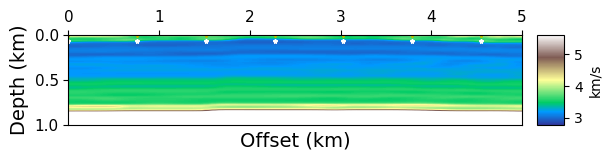

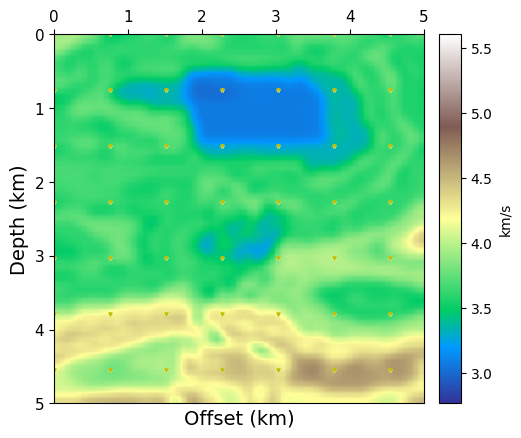

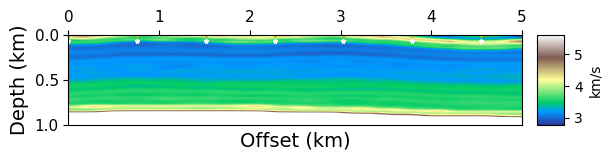

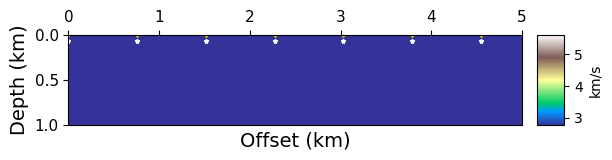

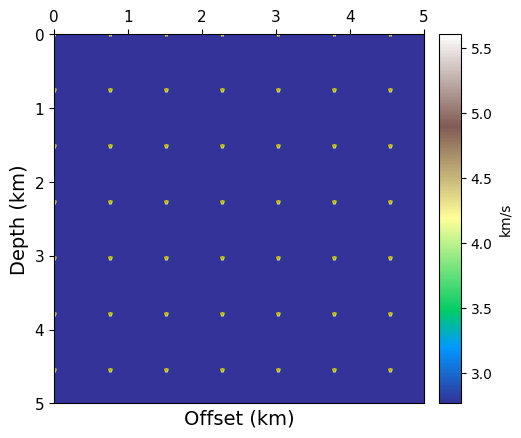

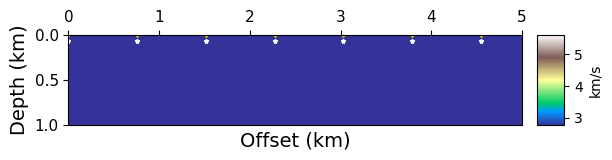

In [3]:
# Setup
if args.use_wandb=='y':
    wandb.config.update(args)

seed = args.seed

set_seed(seed)
device = set_device()

if args.model_type=='arid':
    vel = np.fromfile('../data/seam_arid', np.float32).reshape(400,400,600)/1000
    # vel3d = np.moveaxis(vel[::args.sampling_rate,::args.sampling_rate,::args.sampling_rate], -1, 0)[4:325,:,:]
    vel3d = np.moveaxis(vel[::args.sampling_rate,::args.sampling_rate,::args.sampling_rate], -1, 0)[5:83,:,:]
    vel3d = gaussian_filter(vel3d, sigma=[1,1,1])

# Medium
data_type = args.data_type
deltar = args.rec_spacing
deltas = args.sou_spacing

# Computational model parameters
zmin = 0; zmax = args.max_depth; #deltaz = args.vertical_spacing;
ymin = 0.; ymax = args.max_offset; #deltay = args.lateral_spacing;
xmin = 0.; xmax = args.max_offset; #deltax = args.lateral_spacing;

if args.earth_scale=='y':
    earth_radi = 6371/args.scale_factor # Average in km
    xmin, xmax, deltax = earth_radi*xmin, earth_radi*xmax, earth_radi*deltax
    ymin, ymax, deltay = earth_radi*ymin, earth_radi*ymax, earth_radi*deltay
    zmin, zmax, deltaz = earth_radi*zmin, earth_radi*zmax, earth_radi*deltaz

z = np.linspace(zmin,zmax,vel3d.shape[0])
nz = z.size

y = np.linspace(ymin,ymax,vel3d.shape[1])
ny = y.size

x = np.linspace(xmin,xmax,vel3d.shape[2])
nx = x.size

print(len(x), len(y), len(z))

Z,Y,X = np.meshgrid(z,y,x,indexing='ij')

deltax, deltay, deltaz = x[1]-x[0], y[1]-y[0], z[1]-z[0]

# Number of training points
num_tr_pts = 4000 #int(args.num_points * nz * nx)

if args.field_synthetic=='y':
    import pandas as pd
    import pygmt
    import numpy as np

    import pandas as pd

    # Earthquake events location
    location = pd.read_csv('/home/taufikmh/KAUST/fall_2022/GFATT_PINNs/data/fang_etal_2020/sjfzcatlog.csv')

    # Recorded traveltime data
    traveltime = pd.read_table('/home/taufikmh/KAUST/fall_2022/GFATT_PINNs/data/fang_etal_2020/sjfz_traveltime.dat', delim_whitespace='y')

    # Rounding to make the coordinates rounding the same
    location, traveltime = location.round(3), traveltime.round(3)

    # Merge
    data = pd.merge(traveltime, location,  how='left', left_on=['evlat','evlon','evdep'], right_on = ['evlat','evlon','evdep'])

    # Create earthquake group
    data['event_id'] = data.groupby(['evlat', 'evlon', 'evdep']).cumcount() + 1
    data['station_id'] = data.groupby(['stlat', 'stlon', 'stele']).cumcount() + 1

    # Station only
    sta_only = data.drop_duplicates(subset=['stlat', 'stlon'], keep='last')

    # Event only
    eve_only = data.drop_duplicates(subset=['evlat', 'evlon'], keep='last')

    region = [-118, -115, 32.5, 34.50]
    x0,x1,y0,y1 = -117.45, -115.55, 34.15, 32.76

    # eve_only['dist_to_line'] = 
    p1=np.array([(360+x0)*np.ones_like(eve_only.event_id.values), y0*np.ones_like(eve_only.event_id.values)])
    p2=np.array([(360+x1)*np.ones_like(eve_only.event_id.values), y1*np.ones_like(eve_only.event_id.values)])
    p3=np.array([eve_only.evlon, eve_only.evlat])

    d = pd.DataFrame(np.cross((p2-p1).T,(p3-p1).T)/np.linalg.norm((p2-p1).T))
    eve_only.loc[:, 'closest_event'] = np.copy(d[0].values)

    # sta_only['dist_to_line'] = 
    p1=np.array([(360+x0)*np.ones_like(sta_only.station_id.values), y0*np.ones_like(sta_only.station_id.values)])
    p2=np.array([(360+x1)*np.ones_like(sta_only.station_id.values), y1*np.ones_like(sta_only.station_id.values)])
    p3=np.array([sta_only.stlon, sta_only.stlat])

    d = pd.DataFrame(np.cross((p2-p1).T,(p3-p1).T)/np.linalg.norm((p2-p1).T))
    sta_only.loc[:, 'closest_station'] = np.copy(d[0].values)

    closest_sta = sta_only[np.abs(sta_only['closest_station'])<0.003]
    closest_eve = eve_only[np.abs(eve_only['closest_event'])<0.00003]

    grid = pygmt.datasets.load_earth_relief(resolution="03m", region=region)

    points = pd.DataFrame(
        data=np.linspace(start=(x0, y0), stop=(x1, y1), num=len(x)),
        columns=["x", "y"],
    )

    track = pygmt.grdtrack(points=points, grid=grid, newcolname="elevation")
    xtop = track.x.values + 360
    ztop = track.elevation.values*1e-3

    xsta = closest_sta.stlon.values
    zsta = closest_sta.stele.values

    xeve = closest_eve.evlon.values
    zeve = closest_eve.evdep.values

    xtop,xsta,xeve = xtop-xtop.min(),xsta-xsta.min(),xeve-xeve.min()
    xtop,xsta,xeve = xtop/xtop.max()*xmax,xsta/xsta.max()*xmax,xeve/xeve.max()*xmax
    
    ytop,ysta,yeve = ytop-ytop.min(),ysta-ysta.min(),yeve-yeve.min()
    ytop,ysta,yeve = ytop/ytop.max()*ymax,ysta/ysta.max()*ymax,yeve/yeve.max()*ymax

    ztop,zsta,zeve = ztop-ztop.min(),zsta-zsta.min(),zeve-zeve.min()
    ztop,zsta,zeve = args.station_factor*ztop/ztop.max()+zmin,args.station_factor*zsta/zsta.max()+zmin,zmax-args.event_factor*zeve/zeve.max()

    xsta,xeve = xsta[(xsta>xtop.min()) & (xsta<xtop.max())], xeve[(xeve>xtop.min()) & (xeve<xtop.max())]
    ysta,yeve = ysta[(ysta>ytop.min()) & (ysta<ytop.max())], yeve[(yeve>ytop.min()) & (yeve<ytop.max())]
    zsta,zeve = zsta[(xsta>xtop.min()) & (xsta<xtop.max())],zeve[(xeve>xtop.min()) & (xeve<xtop.max())]

    if args.exclude_topo=='y':
        ztop, zsta = zmin*np.ones_like(ztop), zmin*np.ones_like(zsta)

    ztop, zsta = zmin-ztop, zmin-zsta

    id_sou_z = np.array([]).astype(int)

    for szi in zeve.round(2):
        sid = np.where(np.abs(z.round(3)-szi)<1e-6)
        id_sou_z = np.append(id_sou_z,sid)

    id_rec_z = np.array([]).astype(int)

    for rzi in zsta.round(2):
        sid = np.where(np.abs(z.round(3)-rzi)<1e-6)
        id_rec_z = np.append(id_rec_z,sid)

    id_sou_y = np.array([]).astype(int)

    for syi in yeve.round(2):
        sid = np.where(np.abs(y.round(3)-syi)<1.5e-2)
        id_sou_y = np.append(id_sou_y,sid)

    id_rec_y = np.array([]).astype(int)

    for ryi in ysta.round(2):
        sid = np.where(np.abs(y.round(3)-ryi)<1.5e-2)
        id_rec_y = np.append(id_rec_y,sid)
        
    id_sou_x = np.array([]).astype(int)

    for sxi in xeve.round(2):
        sid = np.where(np.abs(x.round(3)-sxi)<1.5e-2)
        id_sou_x = np.append(id_sou_x,sid)

    id_rec_x = np.array([]).astype(int)

    for rxi in xsta.round(2):
        sid = np.where(np.abs(x.round(3)-rxi)<1.5e-2)
        id_rec_x = np.append(id_rec_x,sid)

    id_top_x = []
    id_top_y = []
    id_top_z = []

    for h in range(len(xtop)):

        for i in range(len(x)):
            if np.abs(xtop[h]-x[i])<1e-2:
                id_top_x.append(i)
                
        for i in range(len(y)):
            if np.abs(ytop[h]-y[i])<1e-2:
                id_top_y.append(i)

        for j in range(len(z)):    
            if np.abs(ztop[h]-z[j])<5e-3:
                id_top_z.append(j)

    if args.regular_station=='y':
        id_rec_x = id_top_x[::args.rec_spacing]
        id_rec_y = id_top_y[::args.rec_spacing]
        id_rec_z = id_top_z[::args.rec_spacing]

    if args.append_shot=='y':
        for i in range(8):
            id_sou_x = np.append(id_sou_x, len(x)-1-2*i)
            id_sou_y = np.append(id_sou_y, len(y)-1-2*i)
            id_sou_z = np.append(id_sou_z, len(z)-1-int(0.5*i))
            
    # plt.plot(args.plotting_factor*(xtop-xtop.min()), args.plotting_factor*ztop)
    # plt.scatter(args.plotting_factor*(xeve-xtop.min()), args.plotting_factor*zeve)
    # plt.scatter(x[id_rec_x], z[id_rec_z], c='y', marker='v')
    # plt.title('Cross-section')
    # plt.xlabel('X (km)')
    # plt.ylabel('Z (km)')
    # plt.gca().invert_yaxis()
    # plt.axis('tight')
    # plt.savefig(os.path.join(wandb_dir, 'cross_section.pdf'), format='pdf', bbox_inches="tight")
else:
    zeve, yeve, xeve = z[args.zid_source]*np.ones_like(x[::deltas]), y[::deltas], x[::deltas]
    zsta, ysta, xsta = z[args.zid_receiver]*np.ones_like(x[::deltar]), y[::deltar], x[::deltar]
    ztop, ytop, xtop = zmin*np.ones_like(x), np.copy(y), np.copy(x)

    idx_all = np.arange(X.size).reshape(X.shape)
    
    if args.model_type!='white2021':
        # Sources indices
        id_sou = idx_all[args.zid_source, ::deltas, ::deltas].reshape(-1)
    
        # Receivers indices
        id_rec = idx_all[args.zid_receiver, ::deltar, ::deltar].reshape(-1)
    else:
#         id_sou = np.load('id_sou_z100.npy')
#         id_rec = np.load('id_rec_z100.npy')
        
#         # Select portion of the total earthquake events
#         torch.manual_seed(seed)
#         id_sou = id_sou[torch.randint(len(id_sou), (len(id_sou),1))[:len(id_sou)//40]].reshape(-1)
        
        # Sources indices
        id_sou = idx_all[args.zid_source, ::deltas, ::deltas].reshape(-1)
    
        # Receivers indices
        id_rec = idx_all[args.zid_receiver, ::deltar, ::deltar].reshape(-1)

# Keeping the number of shots fixed while centering the shots location
if args.middle_shot=='y':
    id_sou_left = x.shape[0]//2-len(id_sou_x)//2
    id_sou_x = np.array(range(id_sou_left, id_sou_left+len(id_sou_x)))
    id_sou_y = np.array(range(id_sou_left, id_sou_left+len(id_sou_y)))

if args.explode_reflector=='y':
    id_sou_x = np.arange(0, len(x), args.sou_spacing)
    id_sou_y = np.arange(0, len(y), args.sou_spacing)
    id_sou_z = np.ones_like(id_sou_x)*(len(z)-1)

if args.empty_middle=='y':
    id_sou, id_rec = (np.array(id_sou_x)<=(len(x)//2-50))|(np.array(id_sou_x)>=(len(x)//2+50)), (np.array(id_rec_x)<=(len(x)//2-50))|(np.array(id_rec_x)>=(len(x)//2+50))
    if args.field_synthetic=='n':
        id_sou_x = np.array(id_sou_x)[id_sou]
        id_sou_y = np.array(id_sou_y)[id_sou]
        id_sou_z = np.array(id_sou_z)[id_sou]
    id_rec_x = np.array(id_rec_x)[id_rec]
    id_rec_y = np.array(id_rec_y)[id_rec]
    id_rec_z = np.array(id_rec_z)[id_rec]

sz = Z.reshape(-1)[id_sou]
sy = Y.reshape(-1)[id_sou]
sx = X.reshape(-1)[id_sou]

Z,Y,X,SX = np.meshgrid(z,y,x,sx,indexing='ij')
_,_,_,SY = np.meshgrid(z,y,x,sy,indexing='ij')
_,_,_,SZ = np.meshgrid(z,y,x,sz,indexing='ij')
_,_,_,ID = np.meshgrid(z,y,x,np.arange(sx.size),indexing='ij')

# IDH = ID/ID.max()*X.max()
# IDV = ID/ID.max()*Z.max()

## Sources location checkpointing
# for i in range(len(id_sou)):
#     print(np.unique(SX[:,:,:,i]), np.unique(SY[:,:,:,i]), np.unique(SZ[:,:,:,i]))

if args.model_type=='marmousi':
    vel = np.fromfile('../data/marmousi.bin', np.float32).reshape(221, 601)
    x1 = np.linspace(0, 5, 601)
    z1 = np.linspace(0, 1, 221) 
    x2 = np.linspace(0.25, 5, len(x))
    z2 = np.linspace(0.09, 0.55, len(z)) 
    f = interpolate.interp2d(x1, z1, vel, kind='cubic')
    vel = f(x2, z2)
    # Augment a 3D velocity volume from 2D data
    vel3d = np.repeat(vel[:, np.newaxis, :], len(y), axis=1)
elif args.model_type=='seam':
    vel = np.load('/home/taufikmh/KAUST/spring_2022/constrained_eikonal/notebooks/PINNtomo/inputs/seam_model/vel_seam.npy')
    x1 = np.arange(0,1+0.01,0.01)
    z1 = np.arange(0,1+0.01,0.01)
    from scipy import interpolate
    f = interpolate.interp2d(x1, z1, vel, kind='cubic')
    vel = f(x, z)
    # Augment a 3D velocity volume from 2D data
    vel3d = np.repeat(vel[:, np.newaxis, :], len(y), axis=1)
elif args.model_type=='constant':
    vel = 4*np.ones((nz,nx))
elif args.model_type=='gradient':
    vel = 1 + 7*np.meshgrid(x,z)[1]
    
    
# Extending the velocity model in thirs dimension byy repeatin the array
velmodel = np.repeat(vel3d[...,np.newaxis], sx.size,axis=2)

if args.depth_shift=='y':
    zmin, zmax, z, sz, Z, SZ = zmin+5, zmax+5, z+5, sz+5, Z+5, SZ+5

X_star = [Z.reshape(-1,1), Y.reshape(-1,1), X.reshape(-1,1), SY.reshape(-1,1), SX.reshape(-1,1)] # Grid points for prediction 

print(len(x), len(y), len(z))

# Numerical traveltime
T_data3d = numerical_traveltime3d(vel3d, len(x), len(y), len(z), len(id_sou), 
                                  xmin, ymin, zmin, deltax, deltay, deltaz, 
                                  [np.where(x==X[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))], 
                                  [np.where(y==Y[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))], 
                                  [np.where(z==Z[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))])

# ZX plane after
plot_section(vel3d[:,10,:], 'v_true_zx.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou],rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Z[:,:,:,0].reshape(-1)[id_rec])

# XY plane
plot_section(vel3d[5,:,:], 'v_true_xy.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Y[:,:,:,0].reshape(-1)[id_sou],rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Y[:,:,:,0].reshape(-1)[id_rec])

# ZY plane
plot_section(vel3d[:,:,10], 'v_true_zy.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou],rx=Y[:,:,:,0].reshape(-1)[id_rec],rz=Z[:,:,:,0].reshape(-1)[id_rec])

# Plots
if args.model_type=='checkerboard':
    plot_section((6 + 6.5217391304347826*Z[:,:,0])/args.scale_factor, "v_back.pdf", 
                 save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z])
    plot_section(velpert[:,:,0]/args.scale_factor, "v_pert.pdf", 
                 save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z])

# Interpolation
Td_nn = np.zeros_like(T_data3d)
taudx_nn = np.zeros_like(T_data3d)

Ti_data = np.zeros((len(id_rec)*len(id_sou)))
xri = np.tile(X.reshape(-1)[id_rec], len(id_sou))
yri = np.tile(Y.reshape(-1)[id_rec], len(id_sou))
zri = np.tile(Z.reshape(-1)[id_rec], len(id_sou))

xsi = np.repeat(X.reshape(-1)[id_sou], len(id_rec))
ysi = np.repeat(Y.reshape(-1)[id_sou], len(id_rec))
zsi = np.repeat(Z.reshape(-1)[id_sou], len(id_rec))

for i in range(len(id_sou)):
    Ti_data[i*len(id_rec):(i+1)*len(id_rec)] = T_data3d[:,:,:,i].reshape(-1)[id_rec]
    
rand_idx = np.random.permutation(np.arange(len(Ti_data)))

X_ori = np.vstack((xri, yri, zri, xsi, ysi, zsi)).T
y_ori = Ti_data

X_all = X_ori[rand_idx,:]
y_all = y_ori[rand_idx]

X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

X_ori = torch.from_numpy(X_ori).float()

all_dataset = torch.utils.data.TensorDataset(X_all, y_all)

# Use Pytorch's functionality to load data in batches. Here we use full-batch training again.
all_loader = torch.utils.data.DataLoader(all_dataset, batch_size=16, shuffle=True)

if data_type=='nn':
    torch.manual_seed(8888)
    model = FullyConnectedNetwork(6, 1, n_hidden=[args.data_neurons]*args.data_layers, act='elu')
    # optimizer = torch.optim.Adam(model.parameters(), lr=5e-4) # best
    optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
    # scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=int(5*args.reduce_after), verbose=True)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=int(4*args.reduce_after), verbose=True)
    criterion = torch.nn.MSELoss()
    model.train()
    loss_data = []
    for epoch in range(int(5e3)):
        total_loss = 0.
        model.train()
        loss = 0
        for x_i, y_i in all_loader:
            optimizer.zero_grad()
            yest = model(x_i).view(-1)
            loss = criterion(yest, y_i)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if epoch % 50 == 0 and epoch > 0:
            print(f'Epoch: {epoch}, Loss: {total_loss / X_all[:,0].detach().numpy().size}')
        mean_loss = total_loss / X_all[:,0].detach().numpy().size
        # wandb.log({"data_loss": mean_loss})
        scheduler.step(mean_loss)
        loss_data.append(mean_loss)

    Td_nn = np.zeros_like(T_data3d)
    
    if args.field_synthetic=='y':
        X_all = [np.tile(x[id_top_x], len(sx)), np.tile(z[id_top_z], len(sz)), 
                 np.repeat(x[id_sou_x], len(x[id_top_x])), 
                 np.repeat(z[id_sou_z], len(z[id_top_z]))]
    else:
        X_all = [np.tile(x, len(sx)), 
                 np.tile(y, len(sy)),
                 np.tile(z[args.zid_receiver]*np.ones_like(x), len(sz)), 
                 np.repeat(x[id_sou_x], len(x)), 
                 np.repeat(y[id_sou_y], len(y)), 
                 np.repeat(z[id_sou_z], len(z))]

    model.eval()
    Td_pred = model(torch.FloatTensor(X_all).T)

    for i in range(len(id_sou)):
        Td_nn[:,:,:,i] = Td_pred[i*len(x):(i+1)*len(x)].detach().numpy().reshape(-1)

    # Convergence history plot for verification
    fig = plt.figure()
    ax = plt.axes()
    ax.semilogy(loss_data)

    ax.set_xlabel('Epochs',fontsize=14)

    plt.xticks(fontsize=11)

    ax.set_ylabel('Loss',fontsize=14)
    plt.yticks(fontsize=11);
    plt.grid()
    plt.savefig(os.path.join(wandb_dir, "data_loss.pdf"), format='pdf', bbox_inches="tight")

    # Save model
    torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss_data
    }, wandb_dir+'/saved_data_model')

# Analytical solution for the known traveltime part
if args.depth_shift=='y':
    vs = args.initial_velocity #velmodel[np.round((SZ-5)/deltaz).astype(int),np.round(SX/deltax).astype(int),0]
else:
    # vs = 5#vel3d[np.round(SZ/deltaz).astype(int),np.round(SY/deltay).astype(int),np.round(SX/deltax).astype(int)]
    vs = np.multiply(np.ones_like(X), vel3d.reshape(-1)[id_sou])

T0 = np.sqrt((Z-SZ)**2 + (Y-SY)**2 + (X-SX)**2)/vs;
px0 = np.divide(X-SX, T0*vs**2, out=np.zeros_like(T0), where=T0!=0)
py0 = np.divide(Y-SY, T0*vs**2, out=np.zeros_like(T0), where=T0!=0)
pz0 = np.divide(Z-SZ, T0*vs**2, out=np.zeros_like(T0), where=T0!=0)

if args.field_synthetic=='y':
    xf = np.arange(xmin,xmax+0.1*deltax,0.1*deltax)
    zf = np.arange(zmin,zmax+0.1*deltaz,0.1*deltaz)
    T_topo = np.zeros((len(zf), len(xf), len(id_sou_x)))
    for i in range(len(id_sou_x)):
        f = interpolate.interp2d(x, z, T_data3d[:,:,i], kind='cubic')
        T_topo[:,:,i] = f(xf, zf)
    id_top_x = []
    id_top_z = []

    for h in range(len(xtop)):

        for i in range(len(x)):
            if np.abs(xtop[h]-x[i])<1e-2:
                id_top_x.append(i)

        for j in range(len(z)):    
            if np.abs(ztop[h]-z[j])<5e-3:
                id_top_z.append(j)

    taud_topo = np.divide(T_data3d, T0, where=T0!=0)[id_top_z, id_top_x, :]
    T_topo = T_data[id_top_z, id_top_x, :]

    taud_topo = np.repeat(taud_topo, nz).reshape(nx,len(id_sou_x),nz).swapaxes(1,2).swapaxes(0,1)
    T_topo = np.repeat(T_topo, nz).reshape(nx,len(id_sou_x),nz).swapaxes(1,2).swapaxes(0,1)

Td_hc = np.zeros_like(T0)
T0_hc = np.zeros_like(T0)
taud_hc = np.zeros_like(T0)
taudx_hc = np.zeros_like(T0)
taudy_hc = np.zeros_like(T0)

for i in range(len(id_sou)):
    T0_hc[:,:,:,i] = np.moveaxis(np.tile(T0.reshape(X.shape)[args.zid_receiver,:,:,i], nz).reshape(ny,nz,nx), 1, 0)
    # np.tile(T0[args.zid_receiver,:,:,i], nz).reshape(nz,ny,nx)

    # Numerical
    if data_type=='full':
        Td_hc[:,:,:,i] = np.moveaxis(np.tile(T_data3d[args.zid_receiver,:,:,i], nz).reshape(ny,nz,nx), 1, 0)
    # np.tile(T_data3d[args.zid_receiver,:,:,i], nz).reshape(nz,ny,nx)

    # NN-based interpolation
    elif data_type=='nn':
        Td_hc[:,:,:,i] = Td_nn[:,:,:,i].reshape(nz,ny,nx)

    if args.factorization_type=='multiplicative':   
        taud_hc[:,:,:,i] = np.divide(Td_hc[:,:,:,i], T0_hc[:,:,:,i], out=np.ones_like(T0_hc[:,:,:,i]),
                                   where=T0_hc[:,:,:,i]!=0)
    else:
        taud_hc[:,:,:,i] = Td_hc[:,:,:,i] - T0_hc[:,:,:,i]

    # Numerical
    if data_type=='full':
        taudy_hc[:,:,:,i] = np.gradient(taud_hc.reshape(X.shape)[:,:,:,i], deltay, axis=1)
        taudx_hc[:,:,:,i] = np.gradient(taud_hc.reshape(X.shape)[:,:,:,i], deltax, axis=2)

    # NN-based interpolation
    elif data_type=='nn':
        taudy_hc[:,:,:,i] = np.gradient(taud_hc.reshape(X.shape)[:,:,:,i], deltay, axis=1)        
        taudx_hc[:,:,:,i] = np.gradient(taud_hc.reshape(X.shape)[:,:,:,i], deltax, axis=2)

if args.field_synthetic=='y':

    NAN = np.ones_like(X)
    for i in range(z.shape[0]):
        for j in range(x.shape[0]):
            if z[i] < Z[id_top_z, id_top_x, 0][j]:
                NAN[i,j,:] = float("Nan")
                
# # Interpolation check            
# plot_int = len(id_sou)//5 if len(id_sou)>=5 else 1
# for i in range(0, len(id_sou), plot_int):
#     plt.figure()
#     plt.scatter(x[id_rec_x], T_data[id_rec_z,id_rec_x,i], label='Data')
#     plt.scatter(x[id_rec_x], Td_hc[id_rec_z,id_rec_x,i], label='Interpolated')
#     plt.legend(['Data', 'Interpolation'])
#     plt.savefig(os.path.join(wandb_dir, "interpolation.pdf"), format='pdf', bbox_inches="tight")

# Locate source boolean
import time
start_time = time.time()

sids = id_sou

# Locate source boolean
isource = np.ones_like(X_star[0]).reshape(-1,).astype(bool)
isource[sids] = False

velmodel = vel3d.reshape(-1,1)
px0 = px0.reshape(-1,1)
py0 = py0.reshape(-1,1)
pz0 = pz0.reshape(-1,1)
T0 = T0.reshape(-1,1)
T_data = T_data3d.reshape(-1,1)
taud = taud_hc.reshape(-1,1)

if args.factorization_type=='multiplicative':
    taud[~isource] = 1.    
taudx = taudx_hc.reshape(-1,1)
taudy = taudy_hc.reshape(-1,1)
index = ID.reshape(-1,1)

perm_id = np.random.permutation(X.size-sx.size)

vel_smooth = gaussian_filter(vel3d, sigma=[15,5,5])

vw = np.repeat(vel_smooth[:, :, :, np.newaxis], len(id_sou), axis=3)

input_wsrc = [X, Y, Z, SX+len(id_sou), SY+len(id_sou), SZ+len(id_sou), taud, taudx, taudy, T0, px0, py0, pz0, vw, index]
input_wosrc = [i.ravel()[isource.reshape(-1)][perm_id] for i in input_wsrc]
if args.field_synthetic=='y':
    input_wonan = [i.ravel()[~np.isnan(NAN.ravel()[isource.reshape(-1)][perm_id])] for i in input_wosrc]

# Network
lay = 'linear'
ini = args.initialization
bias = 0.2
mean = 0.01
std = 0.05
opttype = 'adam'
lr = args.learning_rate

torch.manual_seed(seed)
if args.residual_network=='n':
    tau_model = FullyConnectedNetwork(4, 1, [args.num_neurons]*args.num_layers, last_act=args.tau_act, act=args.activation, lay=lay, last_multiplier=args.tau_multiplier)
else:
    # tau_model = ResidualNetwork(4, 1, num_neurons=args.num_neurons, num_layers=args.num_layers, act=args.activation, lay=lay, last_multiplier=args.tau_multiplier)
    tau_model = ResidualNetwork(6, 1, num_neurons=args.num_neurons, num_layers=args.num_layers, act=args.activation, lay=lay, last_multiplier=args.tau_multiplier)
tau_model.to(device)

torch.manual_seed(seed)
if args.residual_network=='n':
    v_model = FullyConnectedNetwork(3, 1, [args.num_neurons//2]*args.num_layers, act=args.activation, lay=lay, last_act='tanh', last_multiplier=args.v_multiplier)
else:
    v_model = ResidualNetwork(3, 1, num_neurons=args.num_neurons//2, act='relu', last_act='relu', num_layers=args.num_layers, lay=lay, last_multiplier=args.v_multiplier)
v_model.to(device)
v_model.apply(lambda m: init_weights(m, init_type=ini, bias=bias, mean=mean, std=std))

perc = args.num_points

if args.irregular_grid=='y':
    npoints = int(X.size * perc)
    ipermute = np.random.permutation(np.arange(X.size))[:npoints]
else:
    ipermute = None

# Compute traveltime with randomly initialized network
pde_loader, ic = create_dataloader3dwell([i.ravel() for i in input_wsrc], sx, sy, sz,
                                   shuffle=False, batch_size=2048, fast_loader=True, perm_id=ipermute)

if args.exp_function=='y':
    rec_op = (1-np.exp((Z.reshape(X.shape)-z[args.zid_receiver])**args.exp_factor))
else:
    rec_op = Z.reshape(X.shape)

# if args.factorization_type=='multiplicative':
#     tau_true = np.divide(
#         T_data.reshape(X.shape), 
#         T0.reshape(X.shape), 
#         out=np.ones_like(T0.reshape(X.shape)), 
#         where=T0.reshape(X.shape)!=0
#     )
#     tau_true = tau_true - taud.reshape(X.shape)
#     tau_true = np.divide(
#         tau_true, 
#         rec_op, 
#         out=np.ones_like(Z.reshape(X.shape)), 
#         where=Z.reshape(X.shape)!=0
#     )
#     T_true = (rec_op*tau_true + taud.reshape(X.shape))*T0.reshape(X.shape)
# else:
#     tau_true = T_data.reshape(X.shape) - T0.reshape(X.shape) - taud.reshape(X.shape)
#     tau_true = np.divide(
#         tau_true, 
#         rec_op, 
#         out=np.ones_like(Z.reshape(X.shape)), 
#         where=Z.reshape(X.shape)!=0
#     )
#     T_true = rec_op*tau_true + taud.reshape(X.shape) + T0.reshape(X.shape)

v_init = evaluate_velocity3d(v_model, pde_loader, X.size, batch_size=2048, device=device).detach().cpu().numpy().reshape(X.shape)

elapsed = time.time() - start_time
print('Loading time: %.2f minutes' %(elapsed/60.))

# Optimizer
if opttype == 'adam':
    tau_optimizer = torch.optim.Adam(tau_model.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-5)
    v_optimizer = torch.optim.Adam(v_model.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-5)
elif opttype == 'lbfgs':
    optimizer = torch.optim.LBFGS(list(tau_model.parameters()) + list(v_model.parameters()), line_search_fn="strong_wolfe")

# Scheduler
v_scheduler = ReduceLROnPlateau(v_optimizer, mode='min', factor=0.5, patience=args.reduce_after, verbose=True)
tau_scheduler = ReduceLROnPlateau(tau_optimizer, mode='min', factor=0.5, patience=args.reduce_after, verbose=True)

# ZX plane after
plot_section(v_init.reshape(X.shape)[:,10,:,0], 'v_init_zx.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou],rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Z[:,:,:,0].reshape(-1)[id_rec])

# XY plane
plot_section(v_init.reshape(X.shape)[5,:,:,0], 'v_init_xy.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Y[:,:,:,0].reshape(-1)[id_sou],rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Y[:,:,:,0].reshape(-1)[id_rec])

# ZY plane
plot_section(v_init.reshape(X.shape)[:,:,10,0], 'v_init_zy.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou],rx=Y[:,:,:,0].reshape(-1)[id_rec],rz=Z[:,:,:,0].reshape(-1)[id_rec])

# if data_type!='full':
#     if args.field_synthetic=='y':
#         for i in range(0, len(id_sou_x), plot_int):
#             plot_horizontal(T_data.reshape(X.shape)[id_top_z,id_top_x,i], Td_nn[id_top_z,id_top_x,i], 
#                             x*args.plotting_factor,'Interpolation Comparison','T (s)',
#                             'T_comp_'+str(i)+'.pdf','True','NN', 
#                             save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)
#             plot_horizontal(smooth(np.gradient(T_data.reshape(X.shape)[id_top_z,id_top_x,i]),2,'blackman'), 
#                             np.gradient(Td_nn[id_top_z,id_top_x,i]), 
#                             x*args.plotting_factor,'Interpolation Comparison','dT/dx (s/km)',
#                             'Tdx_comp_'+str(i)+'.pdf','True','NN', 
#                             save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)
#     else:
#         for i in range(0, len(id_sou_x), plot_int):
#             plot_horizontal(T_data.reshape(X.shape)[0,:,i], Td_nn[0,:,i], 
#                             x*args.plotting_factor,'Interpolation Comparison','T (s)',
#                             'T_comp_'+str(i)+'.pdf','True','NN', 
#                             save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)
#             plot_horizontal(smooth(np.gradient(T_data.reshape(X.shape)[0,:,i]),2,'blackman'), np.gradient(Td_nn[0,:,i]), 
#                             x*args.plotting_factor,'Interpolation Comparison','dT/dx (s/km)',
#                             'Tdx_comp_'+str(i)+'.pdf','True','NN', 
#                             save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)

In [25]:
NZ,NY,NX,NSX = np.meshgrid(z,y,x,sx,indexing='ij')
_,_,_,NSY = np.meshgrid(z,y,x,sy,indexing='ij')
_,_,_,NSZ = np.meshgrid(z,y,x,sz,indexing='ij')
_,_,_,NID = np.meshgrid(z,y,x,np.arange(sx.size),indexing='ij')

In [32]:
np.unique(NZ[0,:,:,:]), np.unique(NY[:,0,:,:]), np.unique(NX[:,0,:,:]), np.unique(NSZ[:,:,:,0]), np.unique(NSY[:,:,:,0]), np.unique(NSX[:,:,:,0])

(array([0.]),
 array([0.]),
 array([0.        , 0.07575758, 0.15151515, 0.22727273, 0.3030303 ,
        0.37878788, 0.45454545, 0.53030303, 0.60606061, 0.68181818,
        0.75757576, 0.83333333, 0.90909091, 0.98484848, 1.06060606,
        1.13636364, 1.21212121, 1.28787879, 1.36363636, 1.43939394,
        1.51515152, 1.59090909, 1.66666667, 1.74242424, 1.81818182,
        1.89393939, 1.96969697, 2.04545455, 2.12121212, 2.1969697 ,
        2.27272727, 2.34848485, 2.42424242, 2.5       , 2.57575758,
        2.65151515, 2.72727273, 2.8030303 , 2.87878788, 2.95454545,
        3.03030303, 3.10606061, 3.18181818, 3.25757576, 3.33333333,
        3.40909091, 3.48484848, 3.56060606, 3.63636364, 3.71212121,
        3.78787879, 3.86363636, 3.93939394, 4.01515152, 4.09090909,
        4.16666667, 4.24242424, 4.31818182, 4.39393939, 4.46969697,
        4.54545455, 4.62121212, 4.6969697 , 4.77272727, 4.84848485,
        4.92424242, 5.        ]),
 array([0.06493506]),
 array([0.]),
 array([0.]))

In [22]:
for i in range(sx.shape[0]-1):
    print(sz[i]==np.unique(SZ[:,:,:,i])[0])    

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [8]:
sx.shape

(49,)

In [6]:
X.shape

(78, 67, 67, 49)

In [ ]:
print(y[30])
for i in range(len(x)):
    if i%10==0:
        plot_trace(vel_smooth[:,:,30], vel3d[:,:,30], vel_smooth[:,:,30], i, x, z, 
                   fig_name=None, save_dir=wandb_dir)
        
print(x[20])
for i in range(len(y)):
    if i%10==0:
        plot_trace(vel_smooth[:,20,:], vel3d[:,20,:], vel_smooth[:,20,:], i, x, z, 
                   fig_name=None, save_dir=wandb_dir)

In [ ]:
# ZX plane after
plot_section(v_init.reshape(X.shape)[:,10,:,0], 'v_init_zx.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou])

# XY plane
plot_section(v_init.reshape(X.shape)[5,:,:,0], 'v_init_xy.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Y[:,:,:,0].reshape(-1)[id_sou])

# ZY plane
plot_section(v_init.reshape(X.shape)[:,:,10,0], 'v_init_zy.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou])

In [ ]:
X[:,:,:,0].reshape(-1)[id_sou]

In [ ]:
Y[:,:,:,0].reshape(-1)[id_sou]

In [ ]:
sy

In [ ]:
Z[:,:,:,0].reshape(-1).size

In [ ]:
(Z[:,:,:,0].reshape(-1)[id_sou]*19).max()

### Visualize 3D model

In [ ]:
import pyvista as pv
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("~/science.mplstyle")

from pyvista import examples

pv.global_theme.font.color = 'black'
pv.global_theme.font.family = 'times'

values = vel
values.shape

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array(values.shape) + 1

# Edit the spatial reference
grid.origin = (0,0,0)  # The bottom left corner of the data set
grid.spacing = (deltax, deltay, deltaz)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_data["values"] = values.flatten(order="F")  # Flatten the array!

# Now plot the grid!
grid.plot(show_edges=False, background="white", cmap="terrain", show_bounds=True)

In [ ]:
tmp_idsx = [np.where(x==X[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))]
tmp_idsy = [np.where(y==Y[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))]
tmp_idsz = [np.where(z==Z[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))]

print([np.unique(np.isnan(i)) for i in input_wosrc])

for i in range(len(id_sou)):
    input_item = taudy.reshape(X.shape)
    print("Shot number #"+str(i+1)+" "+str(np.unique(input_item[0,:,:,i]==input_item[-1,:,:,i])))
 
for i in range(len(id_sou)):
    temp = np.copy(T_data3d.reshape(X.shape))
    print(temp[tmp_idsz[i], tmp_idsy[i], tmp_idsx[i], i])

for i in range(0,len(id_sou),len(id_sou)//3):
    # ZX plane after
    print(i,x[np.where(x==X[:,:,:,0].reshape(-1)[id_sou[i]])[0][0]])
    plot_section(Td_hc.reshape(X.shape)[:,np.where(y==Y[:,:,:,i].reshape(-1)[id_sou[i]])[0][0],:,i], 'T_data3d_zx.pdf', save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

    # XY plane
    plot_section(Td_hc.reshape(X.shape)[args.zid_source,:,:,i], 'T_data3d_xy.pdf', save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
                 sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Y[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Y[:,:,:,i].reshape(-1)[id_rec])

    # ZY plane
    plot_section(Td_hc.reshape(X.shape)[:,:,np.where(x==X[:,:,:,i].reshape(-1)[id_sou[i]])[0][0],i], 'T_data3d_zy.pdf', save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=Y[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=Y[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

## Training and Inference

In [4]:
# Training
import time
start_time = time.time()
if args.field_synthetic=='y':
    loss_history = \
        training_loop3d(
            input_wonan, sx, sy, sz,
            tau_model, v_model, tau_optimizer, v_optimizer, args.num_epochs, 
            batch_size=Z.size//2000, device=device, v_scheduler=v_scheduler, tau_scheduler=tau_scheduler,
            fast_loader=True, args=dict_args
    ) 
else:
    loss_history = \
        training_loop3d(
            input_wosrc, sx, sy, sz,
            tau_model, v_model, tau_optimizer, v_optimizer, args.num_epochs, 
            batch_size=Z.size//2000, device=device, v_scheduler=v_scheduler, tau_scheduler=tau_scheduler, 
            fast_loader=True, args=dict_args
    )
elapsed = time.time() - start_time
print('Training time: %.2f minutes' %(elapsed/60.))

# Convergence history plot for verification
fig = plt.figure()
ax = plt.axes()
ax.semilogy(loss_history)
ax.set_xlabel('Epochs',fontsize=14)
plt.xticks(fontsize=11)
ax.set_ylabel('Loss',fontsize=14)
plt.yticks(fontsize=11);212
plt.grid()
plt.savefig(os.path.join(wandb_dir, "loss.pdf"), format='pdf', bbox_inches="tight")

# Prediction
pde_loader, ic = create_dataloader3dwell([i.ravel() for i in input_wsrc], sx, sy, sz,
                                   shuffle=False, batch_size=2048//8, fast_loader=True, perm_id=ipermute)
v_pred = evaluate_velocity3d(v_model, pde_loader)

tau_pred = evaluate_tau3d(tau_model, pde_loader)

v_pred = v_pred.detach().cpu().numpy()
tau_pred = tau_pred.detach().cpu().numpy()

# if args.factorization_type=='multiplicative':
#     t_pred = (taud.reshape(X.shape) + rec_op*tau_pred)*T0.reshape(X.shape)
# else:
#     t_pred = taud.reshape(X.shape) + rec_op*tau_pred.reshape(X.shape) + T0.reshape(X.shape)

# v_pred = v_pred.detach().cpu().numpy().reshape(X.shape)[:,:,0]
# v_true = velmodel.reshape(Z.shape)[::1,:,0]

# if args.rescale_plot=='y':
#     earth_radi = args.plotting_factor # Average in km
#     xmin, xmax, deltax = earth_radi*xmin, earth_radi*xmax, earth_radi*deltax

#     if args.depth_shift=='y':
#         zmin, zmax, deltaz = earth_radi*(zmin-5), earth_radi*(zmax-5), earth_radi*deltaz
#     else:
#         zmin, zmax, deltaz = earth_radi*(zmin-0), earth_radi*(zmax-0), earth_radi*deltaz

#     # Creating grid, extending the velocity model, and prepare list of grid points for training (X_star)
#     z = np.arange(zmin,zmax+deltaz,deltaz)
#     x = np.arange(xmin,xmax+deltax,deltax)

#     # Point-source locations
#     sz = z[id_sou_z]
#     sx = x[id_sou_x]

#     Z,X,SX = np.meshgrid(z,x,sx,indexing='ij')

#     SZ = np.ones(SX.shape)*sz # Creating an array of sources along z with same size as SX

#     t_pred, T_data, T0 = t_pred*args.plotting_factor, T_data*args.plotting_factor, T0*args.plotting_factor

# plot_section(v_pred, "v_pred.pdf", vmin=np.nanmin(velmodel)+0.1, vmax=np.nanmax(velmodel)-0.5, 
#              save_dir=wandb_dir, aspect='equal',
#              xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
#              sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 
# plot_section(velmodel.reshape(Z.shape)[:,:,0], 'v_true.pdf', 
#              vmin=np.nanmin(velmodel)+0.1, vmax=np.nanmax(velmodel)-0.5, 
#              save_dir=wandb_dir, aspect='equal',
#              xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
#              sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 

# for i in range(0, len(id_sou_x), plot_int):
#     plot_section(tau_true[:,:,i], "tau_true_"+str(i)+".pdf", 's/km', 
#                  vmin=tau_true.min(), vmax=tau_true.max(), 
#                  save_dir=wandb_dir, aspect='equal',
#                  xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
#                  sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 
#     plot_section(-tau_pred.reshape(Z.shape)[:,:,i], "tau_pred_"+str(i)+".pdf", 's/km', 
#                  vmin=tau_true.min(), vmax=tau_true.max(), 
#                  save_dir=wandb_dir, aspect='equal',
#                  xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
#                  sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 
#     plot_contour(t_pred.reshape(X.shape), T_true.reshape(X.shape),
#                  T0.reshape(X.shape), i, nx, nz, len(id_sou_x), sx, sz, x, z,
#                  'contour_'+str(i)+'.pdf', save_dir=wandb_dir)
#     plot_section(t_pred.reshape(X.shape)[:,:,i], 't_pred_'+str(i)+'.pdf', 's', 
#                  save_dir=wandb_dir, aspect='equal') 

# v_pred[0,:] = np.copy(v_pred[1,:])

# for i in range(0, len(x), len(x)//5):
#     plot_trace(v_init, v_true, v_pred, i, x, z, "v_trace_"+str(i)+".pdf", save_dir=wandb_dir)

# ZX plane after
plot_section(v_pred[:,0,:,i], 'v_pred_zx.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

# XY plane
plot_section(v_pred[args.zid_source,:,:,i], 'v_pred_xy.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Y[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Y[:,:,:,i].reshape(-1)[id_rec])

# ZY plane
plot_section(v_pred[:,:,0,i], 'v_pred_zy.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=Y[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

# Save model
torch.save({
        'tau_model_state_dict': tau_model.state_dict(),
        'v_model_state_dict': v_model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss_history
}, wandb_dir+'/saved_model')

# To load
checkpoint = torch.load(wandb_dir+'/saved_model')
tau_model.load_state_dict(checkpoint['tau_model_state_dict'])
v_model.load_state_dict(checkpoint['v_model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

Epoch 0, Loss 0.0001636
Epoch 3, Loss 0.0001604
Epoch 6, Loss 0.0001603
Epoch 9, Loss 0.0001228
Epoch 12, Loss 0.0000927
Epoch 15, Loss 0.0000883
Epoch 18, Loss 0.0000853
Epoch 21, Loss 0.0000830
Epoch 24, Loss 0.0000809
Epoch 27, Loss 0.0000791
Epoch 30, Loss 0.0000774
Epoch 33, Loss 0.0000757
Epoch 36, Loss 0.0000737
Epoch 39, Loss 0.0000715
Epoch 42, Loss 0.0000844
Epoch 45, Loss 0.0000690
Epoch 48, Loss 0.0000692
Epoch 51, Loss 0.0000661
Epoch 54, Loss 0.0000652
Epoch 57, Loss 0.0000638
Epoch 60, Loss 0.0000619
Epoch 63, Loss 0.0000606
Epoch 66, Loss 0.0000597
Epoch 69, Loss 0.0000590
Epoch 72, Loss 0.0000583
Epoch 75, Loss 0.0000576
Epoch 78, Loss 0.0000570
Epoch 81, Loss 0.0000563
Epoch 84, Loss 0.0000555
Epoch 87, Loss 0.0000547
Epoch 90, Loss 0.0000539
Epoch 93, Loss 0.0000531
Epoch 96, Loss 0.0000522
Epoch 99, Loss 0.0000512
Epoch 102, Loss 0.0000502
Epoch 105, Loss 0.0000493
Epoch 108, Loss 0.0000486
Epoch 111, Loss 0.0000481
Epoch 114, Loss 0.0000476
Epoch 117, Loss 0.000047

KeyboardInterrupt: 

In [5]:
wandb_dir

'/home/taufikmh/KAUST/fall_2022/external_repos/copy-HCPINNsEikonal-dev/notebooks/wandb/run-20230213_151031-5p05onbq/files'

## Save models

In [ ]:
# Save model
torch.save({
        'tau_model_state_dict': tau_model.state_dict(),
        'v_model_state_dict': v_model.state_dict(),
        'v_optimizer_state_dict': v_optimizer.state_dict(),
        'tau_optimizer_state_dict': tau_optimizer.state_dict()
}, wandb_dir+'/saved_model')

# To load
checkpoint = torch.load(wandb_dir+'/saved_model')
tau_model.load_state_dict(checkpoint['tau_model_state_dict'])
v_model.load_state_dict(checkpoint['v_model_state_dict'])
v_optimizer.load_state_dict(checkpoint['v_optimizer_state_dict'])
tau_optimizer.load_state_dict(checkpoint['tau_optimizer_state_dict'])

In [ ]:
# XY plane
i=1
plot_depth(vel_smooth[i,:,:], 'v_init_xy_z_'+str(round(z[i], 2))+'.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Y[:,:,:,0].reshape(-1)[id_sou])

# XY plane
plot_depth(v_pred[i,:,:], 'v_pred_xy_z_'+str(round(z[i], 2))+'.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Y[:,:,:,0].reshape(-1)[id_sou])

# XY plane
plot_depth(vel3d[i,:,:], 'v_true_xy_z_'+str(round(z[i], 2))+'.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Y[:,:,:,0].reshape(-1)[id_sou])

In [ ]:
j=10

# ZX plane
plot_section(vel3d[:,j,:], 'v_true_zx_y_'+str(round(y[j], 2))+'.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou])

# ZX plane
i=0
plot_section(v_pred[:,j,:], 'v_pred_zx_y_'+str(round(y[j], 2))+'.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou])

# ZX plane
plot_section(vel_smooth[:,j,:], 'v_init_zx_y_'+str(round(y[j], 2))+'.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou])

In [ ]:
j=10

# ZY plane
plot_section(vel3d[:,:,j], 'v_true_zy_x_'+str(round(x[j], 2))+'.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou])

# ZY plane
i=0
plot_section(v_pred[:,:,j], 'v_pred_zy_x_'+str(round(x[j], 2))+'.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou])

# ZY plane
plot_section(vel_smooth[:,:,j], 'v_init_zy_x_'+str(round(x[j], 2))+'.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou])

## Playground

In [4]:
# To load
checkpoint = torch.load(wandb_dir+'/saved_model')
tau_model.load_state_dict(checkpoint['tau_model_state_dict'])
v_model.load_state_dict(checkpoint['v_model_state_dict'])
v_optimizer.load_state_dict(checkpoint['v_optimizer_state_dict'])
tau_optimizer.load_state_dict(checkpoint['tau_optimizer_state_dict'])

# Prediction
pde_loader, ic = create_dataloader3dwell([i.ravel() for i in input_wsrc], sx, sy, sz,
                                   shuffle=False, batch_size=2048, fast_loader=True, perm_id=ipermute)
v_pred = evaluate_velocity3d(v_model, pde_loader, X.size, batch_size=2048, device=device)

# tau_pred = evaluate_tau3d(tau_model, pde_loader, X.size, batch_size=2048//8, device=device)

v_pred = v_pred.detach().cpu().numpy().reshape(X.shape)[:,:,:,0] + vel_smooth
# tau_pred = tau_pred.detach().cpu().numpy()

# ZX plane after
plot_section(v_pred[:,10,:], 'v_pred_zx.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

# XY plane
plot_section(v_pred[5,:,:], 'v_pred_xy.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Y[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Y[:,:,:,i].reshape(-1)[id_rec])

# ZY plane
plot_section(v_pred[:,:,10], 'v_pred_zy.pdf', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=Y[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

FileNotFoundError: [Errno 2] No such file or directory: '/home/taufikmh/KAUST/fall_2022/external_repos/copy-HCPINNsEikonal-dev/notebooks/wandb/run-20230213_151031-5p05onbq/saved_model'

In [ ]:
wandb_dir

In [ ]:
print(y[30])
for i in range(len(x)):
    if i%10==0:
        plot_trace(vel_smooth[:,:,30], vel3d[:,:,30], v_pred[:,:,30], i, x, z, 
                   fig_name='trace_x_'+str(round(x[i], 2))+'.pdf', save_dir=wandb_dir)
        
print(x[20])
for i in range(len(y)):
    if i%10==0:
        plot_trace(vel_smooth[:,20,:], vel3d[:,20,:], v_pred[:,20,:], i, x, z, 
                   fig_name='trace_y_'+str(round(y[i], 2))+'.pdf', save_dir=wandb_dir)

In [ ]:
z[61]

In [ ]:
vel3d[61,0,0]

## New 3-D Plots

In [ ]:
vel3d.shape

In [ ]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

from pyvista import examples

values = vel3d

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array(values.shape) + 1

# Edit the spatial reference
grid.origin = (0,0,0)  # The bottom left corner of the data set
grid.spacing = (1, 1, 1)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_data["values"] = values.flatten(order="F")  # Flatten the array!

cmap = plt.cm.get_cmap("terrain")

# Now plot the grid!
slices = grid.slice_orthogonal(x=5, y=5, z=5)
slices.plot(cmap=cmap, jupyter_backend='pythreejs', background='white', show_axes=True)

In [ ]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

from pyvista import examples

mesh = examples.load_channels()
cmap = plt.cm.get_cmap("terrain")

slices = mesh.slice_orthogonal(x=20, y=20, z=30)
slices.plot(cmap=cmap, jupyter_backend='pythreejs', background='white', show_axes=True)

## Screenshot

In [ ]:
mesh

In [ ]:
grid